<a href="https://colab.research.google.com/github/yadavrishi34/Machine_Learning_Repository/blob/master/Project_18_Predict_A_Doctor's_Consultation_Fee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.



https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [1]:
#get acess google drive data into google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_train=pd.read_excel (r'/content/Dr_Cons_Final_Train.xlsx',sep=',',na_values=".")
df_train["source"]="train"
df_test=pd.read_excel (r'/content/Dr_Cons_Final_Test.xlsx',sep=',',na_values=".")
df_test["source"]="test"
df_doc=pd.concat([df_train,df_test])
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [4]:
#lets reset the index
df_doc.reset_index(drop=True,inplace=True)

In [5]:
#displaying the data
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [6]:
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
 7   source              7948 non-null   object 
dtypes: float64(1), object(7)
memory usage: 496.9+ KB


In [7]:
#lets chcek the null values
df_doc.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

In [8]:
#Lets chcek the value counts of object type columns
for col in df_doc.columns:
    if df_doc[col].dtype=="object":
        print(df_doc[col].value_counts())
        print()

BDS                                                                                                                                                                                   632
BHMS                                                                                                                                                                                  627
BAMS                                                                                                                                                                                  624
MBBS                                                                                                                                                                                  441
MBBS, MS - ENT                                                                                                                                                                        280
                                                                      

In [9]:
# drop miscellaneous data
df_doc["Miscellaneous_Info"].fillna("missing",inplace=True)

In [10]:
df_doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,missing,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train


In [11]:
#At fisrt we need to strip of " years experience"
df_doc["Experience"]=df_doc["Experience"].str.strip(" years experience")

In [12]:
#lets see the Experice column
df_doc["Experience"]

0       24
1       12
2        9
3       12
4       20
        ..
7943    10
7944     4
7945     9
7946    12
7947     8
Name: Experience, Length: 7948, dtype: object

In [13]:
#Now we need to convert the Experience column to int
df_doc["Experience"]=df_doc["Experience"].astype(int)

In [14]:
#lets chcek the datatype of the columns in datasets
df_doc.dtypes

Qualification          object
Experience              int64
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

In [15]:
#Rating grouped by profile
df_doc.groupby(["Profile"]).agg({"Rating":lambda x: x.value_counts().index[0]})

,Rating
Profile,
Ayurveda,100%
Dentist,100%
Dermatologists,100%
ENT Specialist,100%
General Medicine,100%
Homeopath,100%


In [16]:
df_doc.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7943,False,False,True,False,False,False,True,False
7944,False,False,True,False,False,False,True,False
7945,False,False,True,False,False,False,True,False
7946,False,False,False,False,False,False,True,False


In [17]:
df_doc.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
dtype: int64

In [35]:
df_doc.drop(["Miscellaneous_Info"], axis = 1,inplace = True)

In [36]:
df_doc.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,0 %,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12,0 %,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250.0,train


In [37]:
# replacing na values in Rating with 0% 
df_doc["Rating"].fillna("0 %", inplace = True) 
  


In [38]:
df_doc.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
source           0
dtype: int64

In [39]:
# replacing na values in Place with Missing 
df_doc["Place"].fillna(method ='ffill', inplace = True)

In [40]:
df_doc.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
source           0
dtype: int64

In [41]:
# replacing na values in Place with Missing 
df_doc["Fees"].fillna(df_doc["Fees"].mean(), inplace = True)

In [42]:
df_doc.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
source           0
dtype: int64

In [43]:
df_doc.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
source           0
dtype: int64

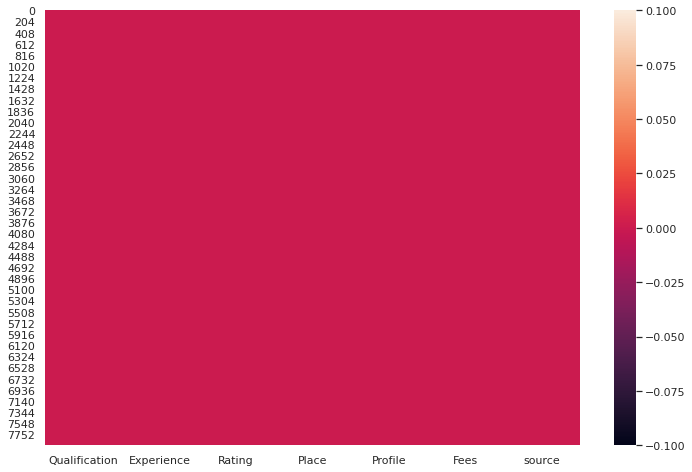

In [44]:
fig=plt.subplots(figsize=(12,8))

sns.heatmap(df_doc.isnull())

# Exploratory data analysis

Exploratory Data Analysis – Exploratory analysis is the first step of data analysis. Here we get familiar with data, ask questions, visualize the data in a number of forms, look for the relationships between the variables, look for the outliers, patterns and trends in data set.

# Data Exploration

In [45]:
df2=df_doc['Fees']

In [46]:
# creating categorical in fees
bin_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

df2 = pd.cut(df2, bins = bins, labels = bin_labels, include_lowest = True)

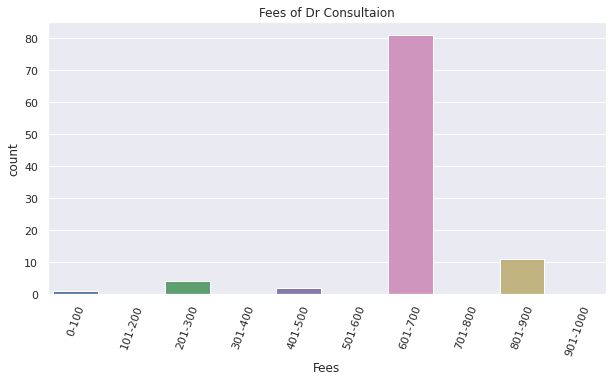

In [47]:
plt.subplots(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(df2)
plt.title('Fees of Dr Consultaion')
plt.xticks(rotation=70)
plt.show()

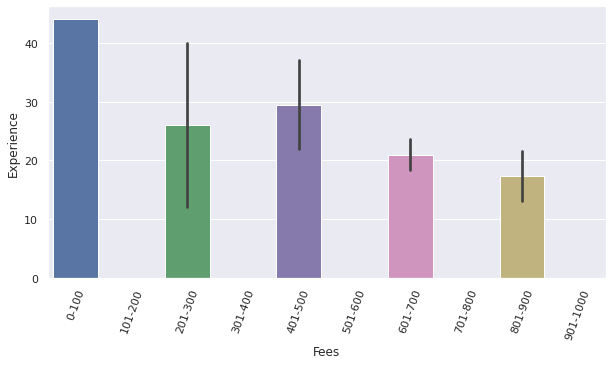

In [48]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=df2,y='Experience', data = df_doc)
plt.xticks(rotation=70)
plt.show()

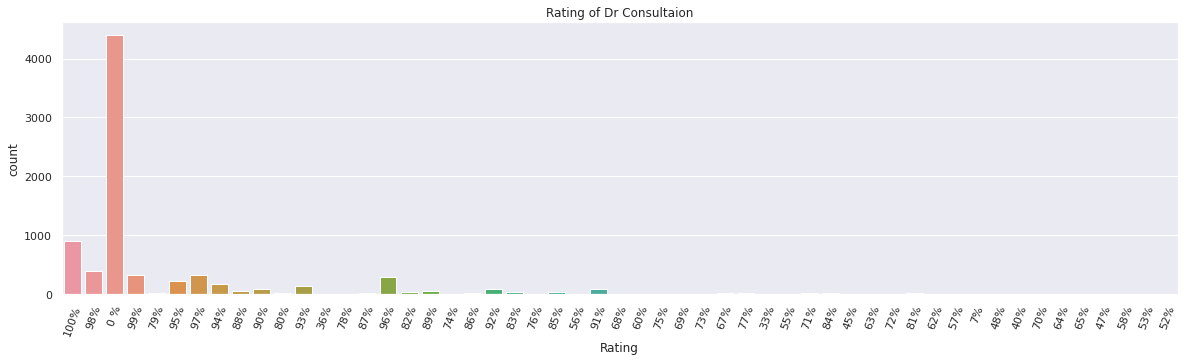

In [49]:
plt.subplots(figsize=(20,5))
sns.countplot(x='Rating',data=df_doc)
plt.title('Rating of Dr Consultaion')
plt.xticks(rotation=70)
plt.show()

# Label Incoding

In [53]:
# features
df_doc.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,0 %,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12,0 %,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250.0,train


In [54]:
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   object 
 1   Experience     7948 non-null   int64  
 2   Rating         7948 non-null   object 
 3   Place          7948 non-null   object 
 4   Profile        7948 non-null   object 
 5   Fees           7948 non-null   float64
 6   source         7948 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 434.8+ KB


In [56]:
data = df_doc.drop(["Fees"], axis=1)

In [57]:
train_categorical_data = df_doc.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = df_doc.select_dtypes(include=['int64','int32'])

In [58]:
train_categorical_data.head()

,Qualification,Rating,Place,Profile,source
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",Homeopath,train
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",Ayurveda,train
2,"MBBS, MS - Otorhinolaryngology",0 %,"Mathikere - BEL, Bangalore",ENT Specialist,train
3,"BSc - Zoology, BAMS",0 %,"Bannerghatta Road, Bangalore",Ayurveda,train
4,BAMS,100%,"Keelkattalai, Chennai",Ayurveda,train


In [59]:
train_numerical_data.head()

,Experience
0,24
1,12
2,9
3,12
4,20


In [60]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)

In [61]:
# Concatenate both catagorical and numerical data

x = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=df_doc['Fees']

In [62]:
x.head()

,Qualification,Rating,Place,Profile,source,Experience
0,491,1,327,5,1,24
1,92,51,936,0,1,12
2,1442,0,499,3,1,9
3,572,0,74,0,1,12
4,16,1,369,0,1,20


In [63]:
y.head()

0    100.0
1    350.0
2    300.0
3    250.0
4    250.0
Name: Fees, dtype: float64

# StandardScaler
With StandardScaler we will be bringing all feature on the same scale

Scalling data always result in better Score

In [64]:
#from sklearn.preprocessing import StandardScaler

#columns = ['Qualification', 'Rating',
       #'Place', 'Profile', 'Miscellaneous_Info', 'Experience', 'source']

#sc=StandardScaler()
#sc_fit=sc.fit(x)
#sc_features=sc.transform(x)
#sc_scaled_features=pd.DataFrame(sc_features,columns=columns)
#sc_scaled_features.head(10)

# statistical data interface

In [65]:
#Lets check the corrrelation matrix
x.corr()

,Qualification,Rating,Place,Profile,source,Experience
Qualification,1.000000,0.063269,0.010360,0.386709,-0.010821,0.129718
Rating,0.063269,1.000000,-0.029438,-0.098999,-0.005415,0.039612
Place,0.010360,-0.029438,1.000000,0.013591,-0.000208,0.019009
Profile,0.386709,-0.098999,0.013591,1.000000,-0.017491,0.190219
source,-0.010821,-0.005415,-0.000208,-0.017491,1.000000,-0.022064
Experience,0.129718,0.039612,0.019009,0.190219,-0.022064,1.000000


Text(0.5, 1.0, 'Correlation Matrix (for Breast_cancer)')

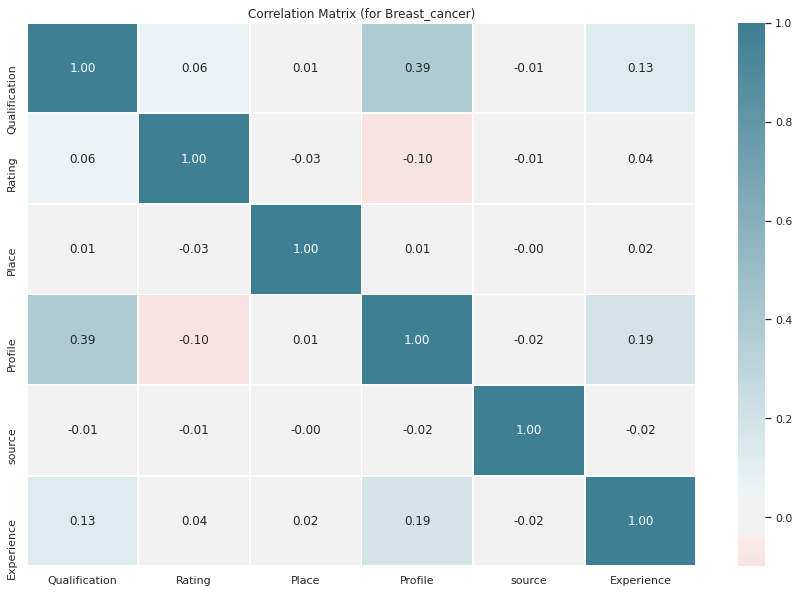

In [66]:
# Correlation Matrix
fig_df=(15,10)
fig,ax=plt.subplots(figsize=fig_df)
cmap=sns.diverging_palette(h_neg=15,h_pos=220,as_cmap=True)

sns.heatmap(x.corr(),center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f',ax=ax);
plt.title('Correlation Matrix (for Breast_cancer)')

In [67]:
# statistical describe data set
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Qualification,7948.0,756.032461,525.721528,0.0,284.75,749.0,1193.00,1800.0
Rating,7948.0,15.379089,21.986208,0.0,0.00,0.0,44.00,52.0
Place,7948.0,451.126069,280.978266,0.0,211.00,444.0,685.25,947.0
Profile,7948.0,2.458606,1.657217,0.0,1.00,2.0,4.00,5.0
source,7948.0,0.750000,0.433040,0.0,0.75,1.0,1.00,1.0
Experience,7948.0,17.446653,11.201217,0.0,9.00,15.0,23.00,66.0


In [68]:
from tabulate import tabulate

stats_ = x.describe().T.drop(["count", "25%", "75%"], axis=1)
stats_ = pd.concat([stats_, x.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "median", "max", "skew" ]
cols = ["mean", "median", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".1f"))

                 mean    median    std    skew    min     max
-------------  ------  --------  -----  ------  -----  ------
Qualification   756.0     749.0  525.7     0.2    0.0  1800.0
Rating           15.4       0.0   22.0     0.8    0.0    52.0
Place           451.1     444.0  281.0     0.1    0.0   947.0
Profile           2.5       2.0    1.7     0.1    0.0     5.0
source            0.8       1.0    0.4    -1.2    0.0     1.0
Experience       17.4      15.0   11.2     1.0    0.0    66.0


# Building Machine Learning Models

Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions.

In [69]:
# import liabraries:

# model test & train split
from sklearn.model_selection import train_test_split

# standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

# encoding categorical values 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# k-Fold Cross-Validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

# stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
# Model Liabraries

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [70]:
# dataset is ready now
# split data into train and test data size
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print('-'*50)
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (5961, 6)
The size of training output is (5961,)
--------------------------------------------------
The size of testing input is (1987, 6)
The size of testing output is (1987,)


# Ridge Regressor

is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.

In [71]:
print('-'*100)
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
print(ridge_regressor.fit(x_train ,y_train))
print('-'*100)


y_train_pred_rr =ridge_regressor.predict(x_train) ##Predict train result
y_test_pred_rr =ridge_regressor.predict(x_test) ##Predict test result


print("Train Results for Ridge Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rr))

print('-'*50)
print("Test Results for Ridge Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_rr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_rr)))
print("R-squared: ", r2_score(y_test, y_test_pred_rr))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)
----------------------------------------------------------------------------------------------------
Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  160.30075767269707
Mean absolute % error:  63.0
R-squared:  0.06702997404388578
-----------------------------------------------

# Lasso Regressor

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [72]:
print('-'*100)
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
print(lasso_regressor.fit(x_train ,y_train))
print('-'*100)

y_train_pred_lr=lasso_regressor.predict(x_train) ##Predict train result
y_test_pred_lr=lasso_regressor.predict(x_test) ##Predict test result

print("Train Results for Lasso Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_lr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_lr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_lr))

print('-'*50)
print("Test Results for Lasso Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_lr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_lr)))
print("R-squared: ", r2_score(y_test, y_test_pred_lr))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)
----------------------------------------------------------------------------------------------------
Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  165.9593516482364
Mean absolute % error

# KNN (K-Nearest Neighbors)

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [73]:
print('-'*100)
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
print(knn_regressor.fit(x_train, y_train))
print('-'*100)

y_train_pred_knn =knn_regressor.predict(x_train) ##Predict train result
y_test_pred_knn =knn_regressor.predict(x_test) ##Predict test result


print("Train Results for KNN Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_knn)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_knn)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_knn))

print('-'*50)
print("Test Results for KNN Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_knn)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred_knn)))
print("R-squared: ", r2_score(y_test, y_test_pred_knn))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)
----------------------------------------------------------------------------------------------------
Train Resul

# DecisionTreeRegressor

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.


In [74]:
print('-'*100)
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
print(tree.fit(x_train,y_train))
print('-'*100)

y_train_pred_dt =tree.predict(x_train) ##Predict train result
y_test_pred_dt =tree.predict(x_test) ##Predict test result

print("Train Results for Decision Tree Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_dt)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_dt)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_dt))

print('-'*50)
print("Test Results for Decision Tree Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_dt)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_dt)))
print("R-squared: ", r2_score(y_test, y_test_pred_dt))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7,

# Random Forest Regressor

A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [75]:
print('-'*100)
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
print(random_regressor.fit(x_train, y_train))
print('-'*100)

y_train_pred_rfr = random_regressor.predict(x_train)
y_test_pred_rfr = random_regressor.predict(x_test)


print("Train Results for Random Forest Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rfr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rfr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rfr))

print('-'*50)
print("Test Results for Random Forest Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_rfr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_rfr)))
print("R-squared: ", r2_score(y_test, y_test_pred_rfr))
print('-'*100)

----------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0

# XGBRegressor

Data Matrix used in XGBoost.

DMatrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data.

In [76]:
print('-'*100)
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
print(model.fit(x_train, y_train))
print('-'*100)

y_train_pred_xgbr = model.predict(x_train)
y_test_pred_xgbr = model.predict(x_test)

print("Train Results for XGBoost Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_xgbr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_xgbr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_xgbr))

print('-'*50)
print("Test Results for XGBoost Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_xgbr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_xgbr)))
print("R-squared: ", r2_score(y_test, y_test_pred_xgbr))
print('-'*100)

----------------------------------------------------------------------------------------------------
[08:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                

# Final Score

In [77]:
# DecisionTreeRegressor, Random Forest Regressor and XGBRegressor are peforming almost equally good
print('Final Score')
print('-'*100)
print("Train Results for Ridge Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rr))
print('-'*100)

print("Train Results for Lasso Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_lr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_lr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_lr))
print('-'*100)


print("Train Results for KNN Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_knn)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_knn)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_knn))
print('-'*100)

print("Train Results for Decision Tree Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_dt)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_dt)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_dt))
print('-'*100)

print("Train Results for Random Forest Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rfr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rfr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rfr))
print('-'*100)

print("Train Results for XGBoost Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_xgbr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_xgbr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_xgbr))
print('-'*100)


Final Score
----------------------------------------------------------------------------------------------------
Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  160.30075767269707
Mean absolute % error:  63.0
R-squared:  0.06702997404388578
----------------------------------------------------------------------------------------------------
Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  165.9593516482364
Mean absolute % error:  65.0
R-squared:  0.0
----------------------------------------------------------------------------------------------------
Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  153.82073507578613
Mean absolute % error:  60.0
R-squared:  0.1409344452514263
----------------------------------------------------------------------------------------------------
Train Resu

# Conclusion

All Alogrithm score is low because there are many missing value we can analys the data on visulasation better than model.